In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("Data/Basketball.csv")

In [3]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [4]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [5]:
data.set_index('Team',inplace = True)


In [6]:
# as team 61 has no data we will drop it 
data.drop(data.index[-1],inplace = True)

In [7]:
data.tail()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Team,,,,,,,,,,,,
Team 56,1,35,38,8,11,19,36,55,-,-,2016_17,17
Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


In [8]:
data.shape

(60, 12)

In [9]:
data.columns

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [10]:
data.isnull().sum()

Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Team 1 to Team 60
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tournament           60 non-null     int64 
 1   Score                60 non-null     object
 2   PlayedGames          60 non-null     object
 3   WonGames             60 non-null     object
 4   DrawnGames           60 non-null     object
 5   LostGames            60 non-null     object
 6   BasketScored         60 non-null     object
 7   BasketGiven          60 non-null     object
 8   TournamentChampion   60 non-null     object
 9   Runner-up            60 non-null     object
 10  TeamLaunch           60 non-null     object
 11  HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(10)
memory usage: 6.1+ KB


As we can see many of the columns are object type so let us see valuecounts of them to see any missing value 

In [12]:
obj_col = ['Score','PlayedGames','WonGames','DrawnGames','LostGames',
           'BasketScored','BasketGiven','TeamLaunch'] 

In [14]:
data = data.drop(['TournamentChampion','Runner-up'],axis= 1)

In [15]:
#before reformatting
data['TeamLaunch'][:10]

Team
Team 1         1929
Team 2         1929
Team 3         1929
Team 4     1931to32
Team 5         1929
Team 6      1934-35
Team 7         1929
Team 8         1929
Team 9      1939-40
Team 10     1932-33
Name: TeamLaunch, dtype: object

In [16]:
#reformatting teamLaunch col
data['TeamLaunch'] = data['TeamLaunch'].str.slice(start = 0,stop = 4)

In [17]:
#afterreformatting
data['TeamLaunch'][:10]

Team
Team 1     1929
Team 2     1929
Team 3     1929
Team 4     1931
Team 5     1929
Team 6     1934
Team 7     1929
Team 8     1929
Team 9     1939
Team 10    1932
Name: TeamLaunch, dtype: object

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.0,4.0,12.0,39.0,86.0
HighestPositionHeld,60.0,7.050000,5.315232,1.0,3.0,6.0,10.0,20.0


##### we can see that some of the dataypes are object type so we can convert them into int64 type and perform describe fuunction and plot them


In [19]:
for col in obj_col:
    data[col] = pd.to_numeric(data[col])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Team 1 to Team 60
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Tournament           60 non-null     int64
 1   Score                60 non-null     int64
 2   PlayedGames          60 non-null     int64
 3   WonGames             60 non-null     int64
 4   DrawnGames           60 non-null     int64
 5   LostGames            60 non-null     int64
 6   BasketScored         60 non-null     int64
 7   BasketGiven          60 non-null     int64
 8   TeamLaunch           60 non-null     int64
 9   HighestPositionHeld  60 non-null     int64
dtypes: int64(10)
memory usage: 5.2+ KB


In [21]:
data.head()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
Team,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1
Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1
Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1
Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1
Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.0,4.00,12.0,39.00,86.0
Score,60.0,916.450000,1138.342899,14.0,104.25,395.5,1360.50,4385.0
PlayedGames,60.0,810.100000,877.465393,30.0,115.50,424.5,1345.50,2762.0
WonGames,60.0,309.033333,408.481395,5.0,34.75,124.0,432.75,1647.0
DrawnGames,60.0,192.083333,201.985508,4.0,26.25,98.5,331.50,633.0
LostGames,60.0,308.816667,294.508639,15.0,62.75,197.5,563.50,1070.0
BasketScored,60.0,1159.350000,1512.063948,34.0,154.50,444.0,1669.75,5947.0
BasketGiven,60.0,1159.233333,1163.946914,55.0,236.00,632.5,2001.25,3889.0
TeamLaunch,60.0,1957.950000,26.646732,1929.0,1934.75,1950.5,1977.25,2016.0
HighestPositionHeld,60.0,7.050000,5.315232,1.0,3.00,6.0,10.00,20.0


In [23]:
data['WinPercent'] = round((data['WonGames']+data['DrawnGames'])/data['PlayedGames']*100,2)
data.head()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,WinPercent
Team,,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,79.62
Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,77.99
Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,70.35
Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,67.68
Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,66.69


In [24]:
data['LossPercent'] = round(data['LostGames']/data['PlayedGames']*100,2)
data.head()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,WinPercent,LossPercent
Team,,,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,79.62,20.38
Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,77.99,22.01
Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,70.35,29.65
Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,67.68,32.32
Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,66.69,33.31


In [25]:
data['WinLossRatio'] = round(data['WonGames']/data['LostGames'],2)
data.head(50)

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,WinPercent,LossPercent,WinLossRatio
Team,,,,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,79.62,20.38,2.93
Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,77.99,22.01,2.60
Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,70.35,29.65,1.60
Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,67.68,32.32,1.38
Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,66.69,33.31,1.31
Team 6,73,2819,2408,990,531,887,3680,3373,1934,1,63.16,36.84,1.12
Team 7,82,2792,2626,948,608,1070,3609,3889,1929,3,59.25,40.75,0.89
Team 8,70,2573,2302,864,577,861,3228,3230,1929,1,62.60,37.40,1.00
Team 9,58,2109,1986,698,522,766,2683,2847,1939,2,61.43,38.57,0.91


# Data Visualization

### TOP 10 TEAMS

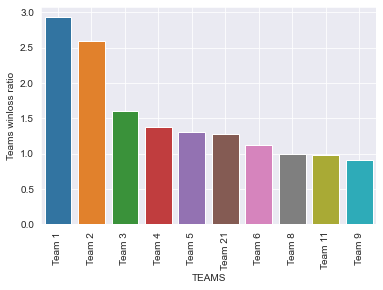

In [26]:
top_winlossratio_df = data['WinLossRatio'].sort_values(ascending = False).head(10)
sns.barplot(y = top_winlossratio_df,x =top_winlossratio_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams winloss ratio")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

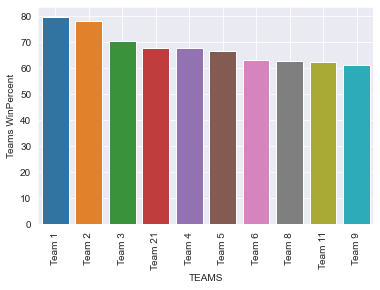

In [27]:
top_winpercent_df = data['WinPercent'].sort_values(ascending = False).head(10)
top_winpercent_df.head()
sns.barplot(y = top_winpercent_df,x = top_winpercent_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams WinPercent")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

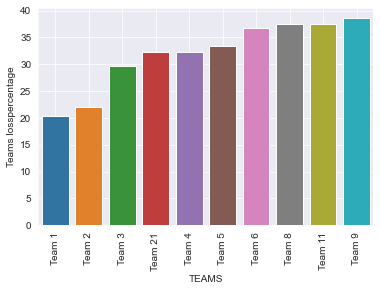

In [28]:
bottom_lossers_df = data['LossPercent'].sort_values(ascending = True).head(10)
sns.barplot(y = bottom_lossers_df,x = bottom_lossers_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams losspercentage")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

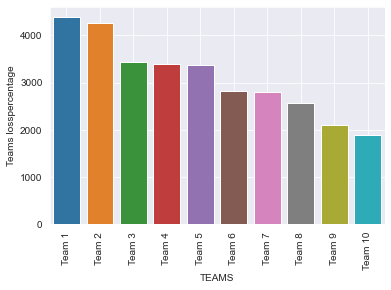

In [29]:
top_scorer_df = data['Score'].sort_values(ascending = False).head(10)
sns.barplot(y = top_scorer_df,x =top_scorer_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams score")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

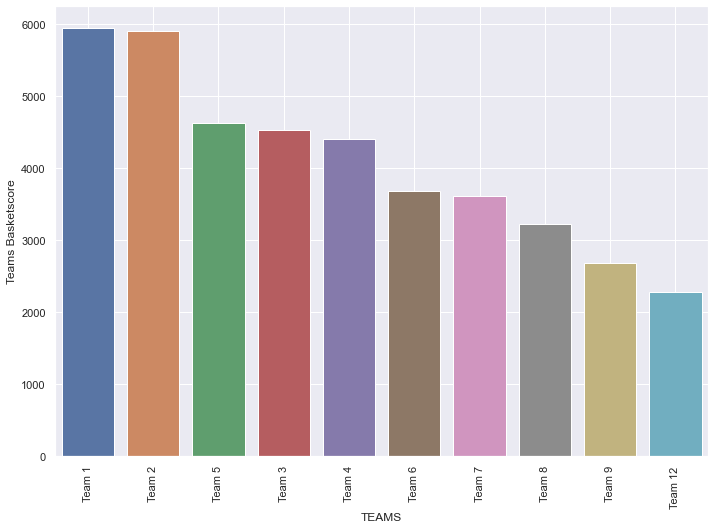

In [45]:
top_basketscore_df = data['BasketScored'].sort_values(ascending = False).head(10)
sns.barplot(y = top_basketscore_df,x = top_basketscore_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams Basketscore")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

### Total

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

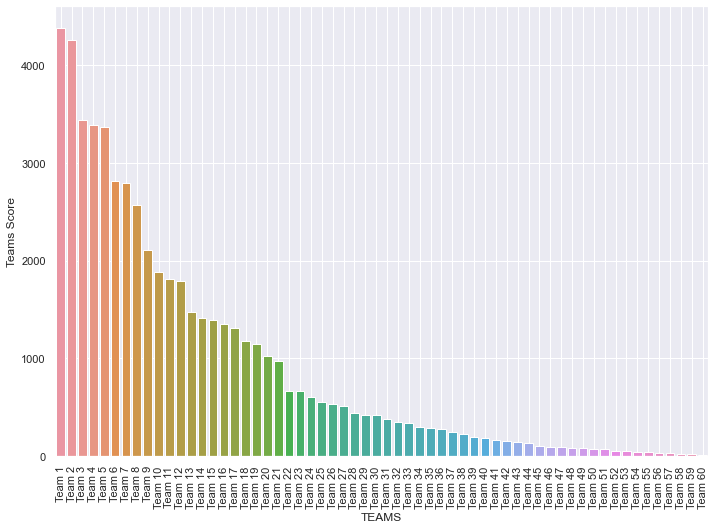

In [32]:
sns.barplot(y = data['Score'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams Score")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show()

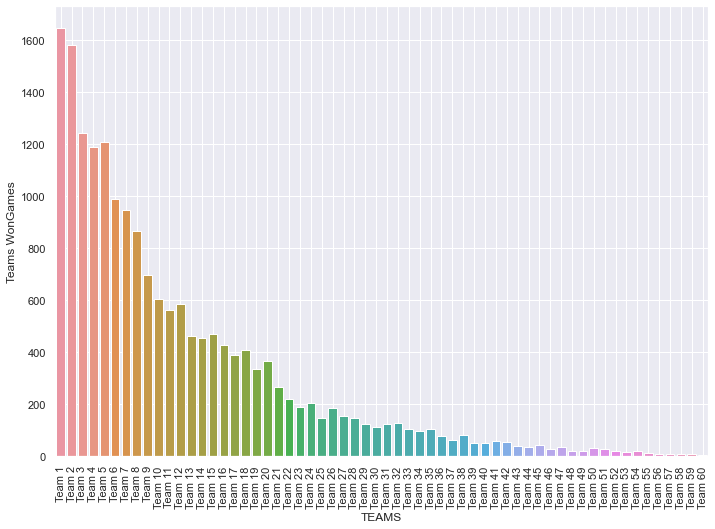

In [33]:
sns.barplot(y = data['WonGames'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams WonGames")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show()

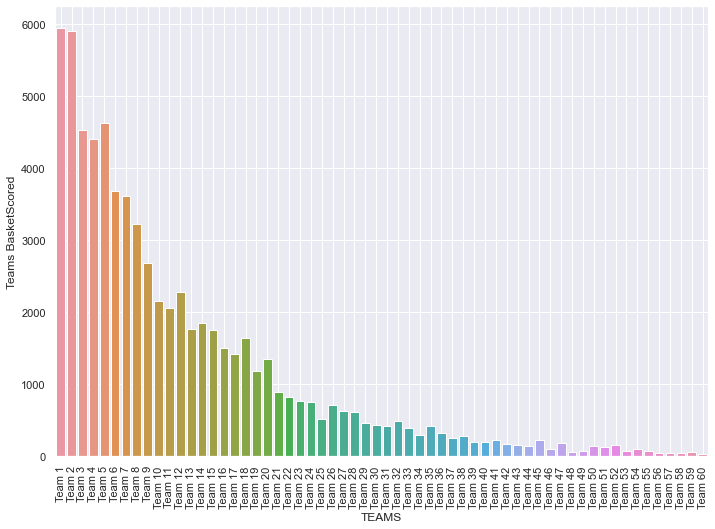

In [34]:
sns.barplot(y = data['BasketScored'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams BasketScored")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
plt.show()

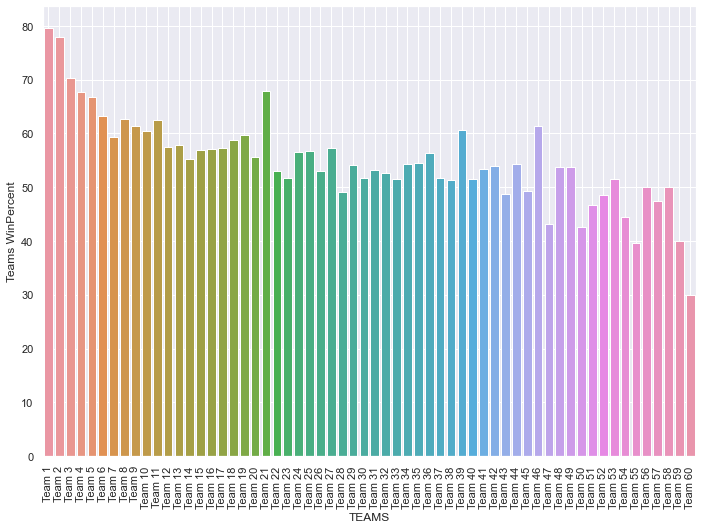

In [35]:
sns.barplot(y = data['WinPercent'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams WinPercent")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show()

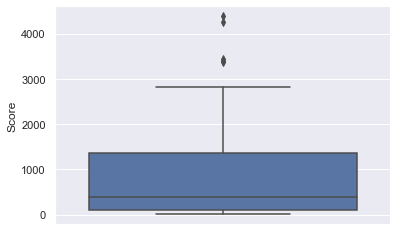

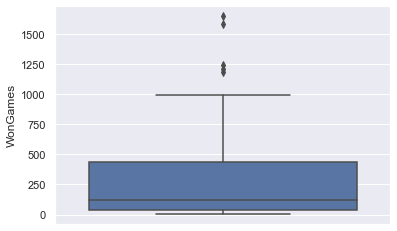

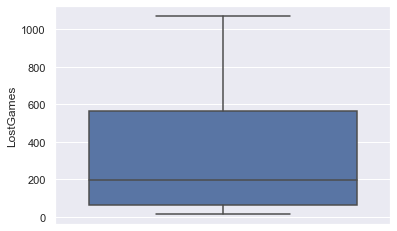

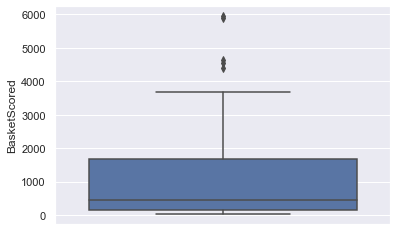

In [60]:
''''Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld' '''
sns.boxplot(y = data['Score'])
plt.show()
sns.boxplot(y = data['WonGames'])
plt.show()
sns.boxplot(y = data['LostGames'])
plt.show()
sns.boxplot(y = data['BasketScored'])
plt.show()

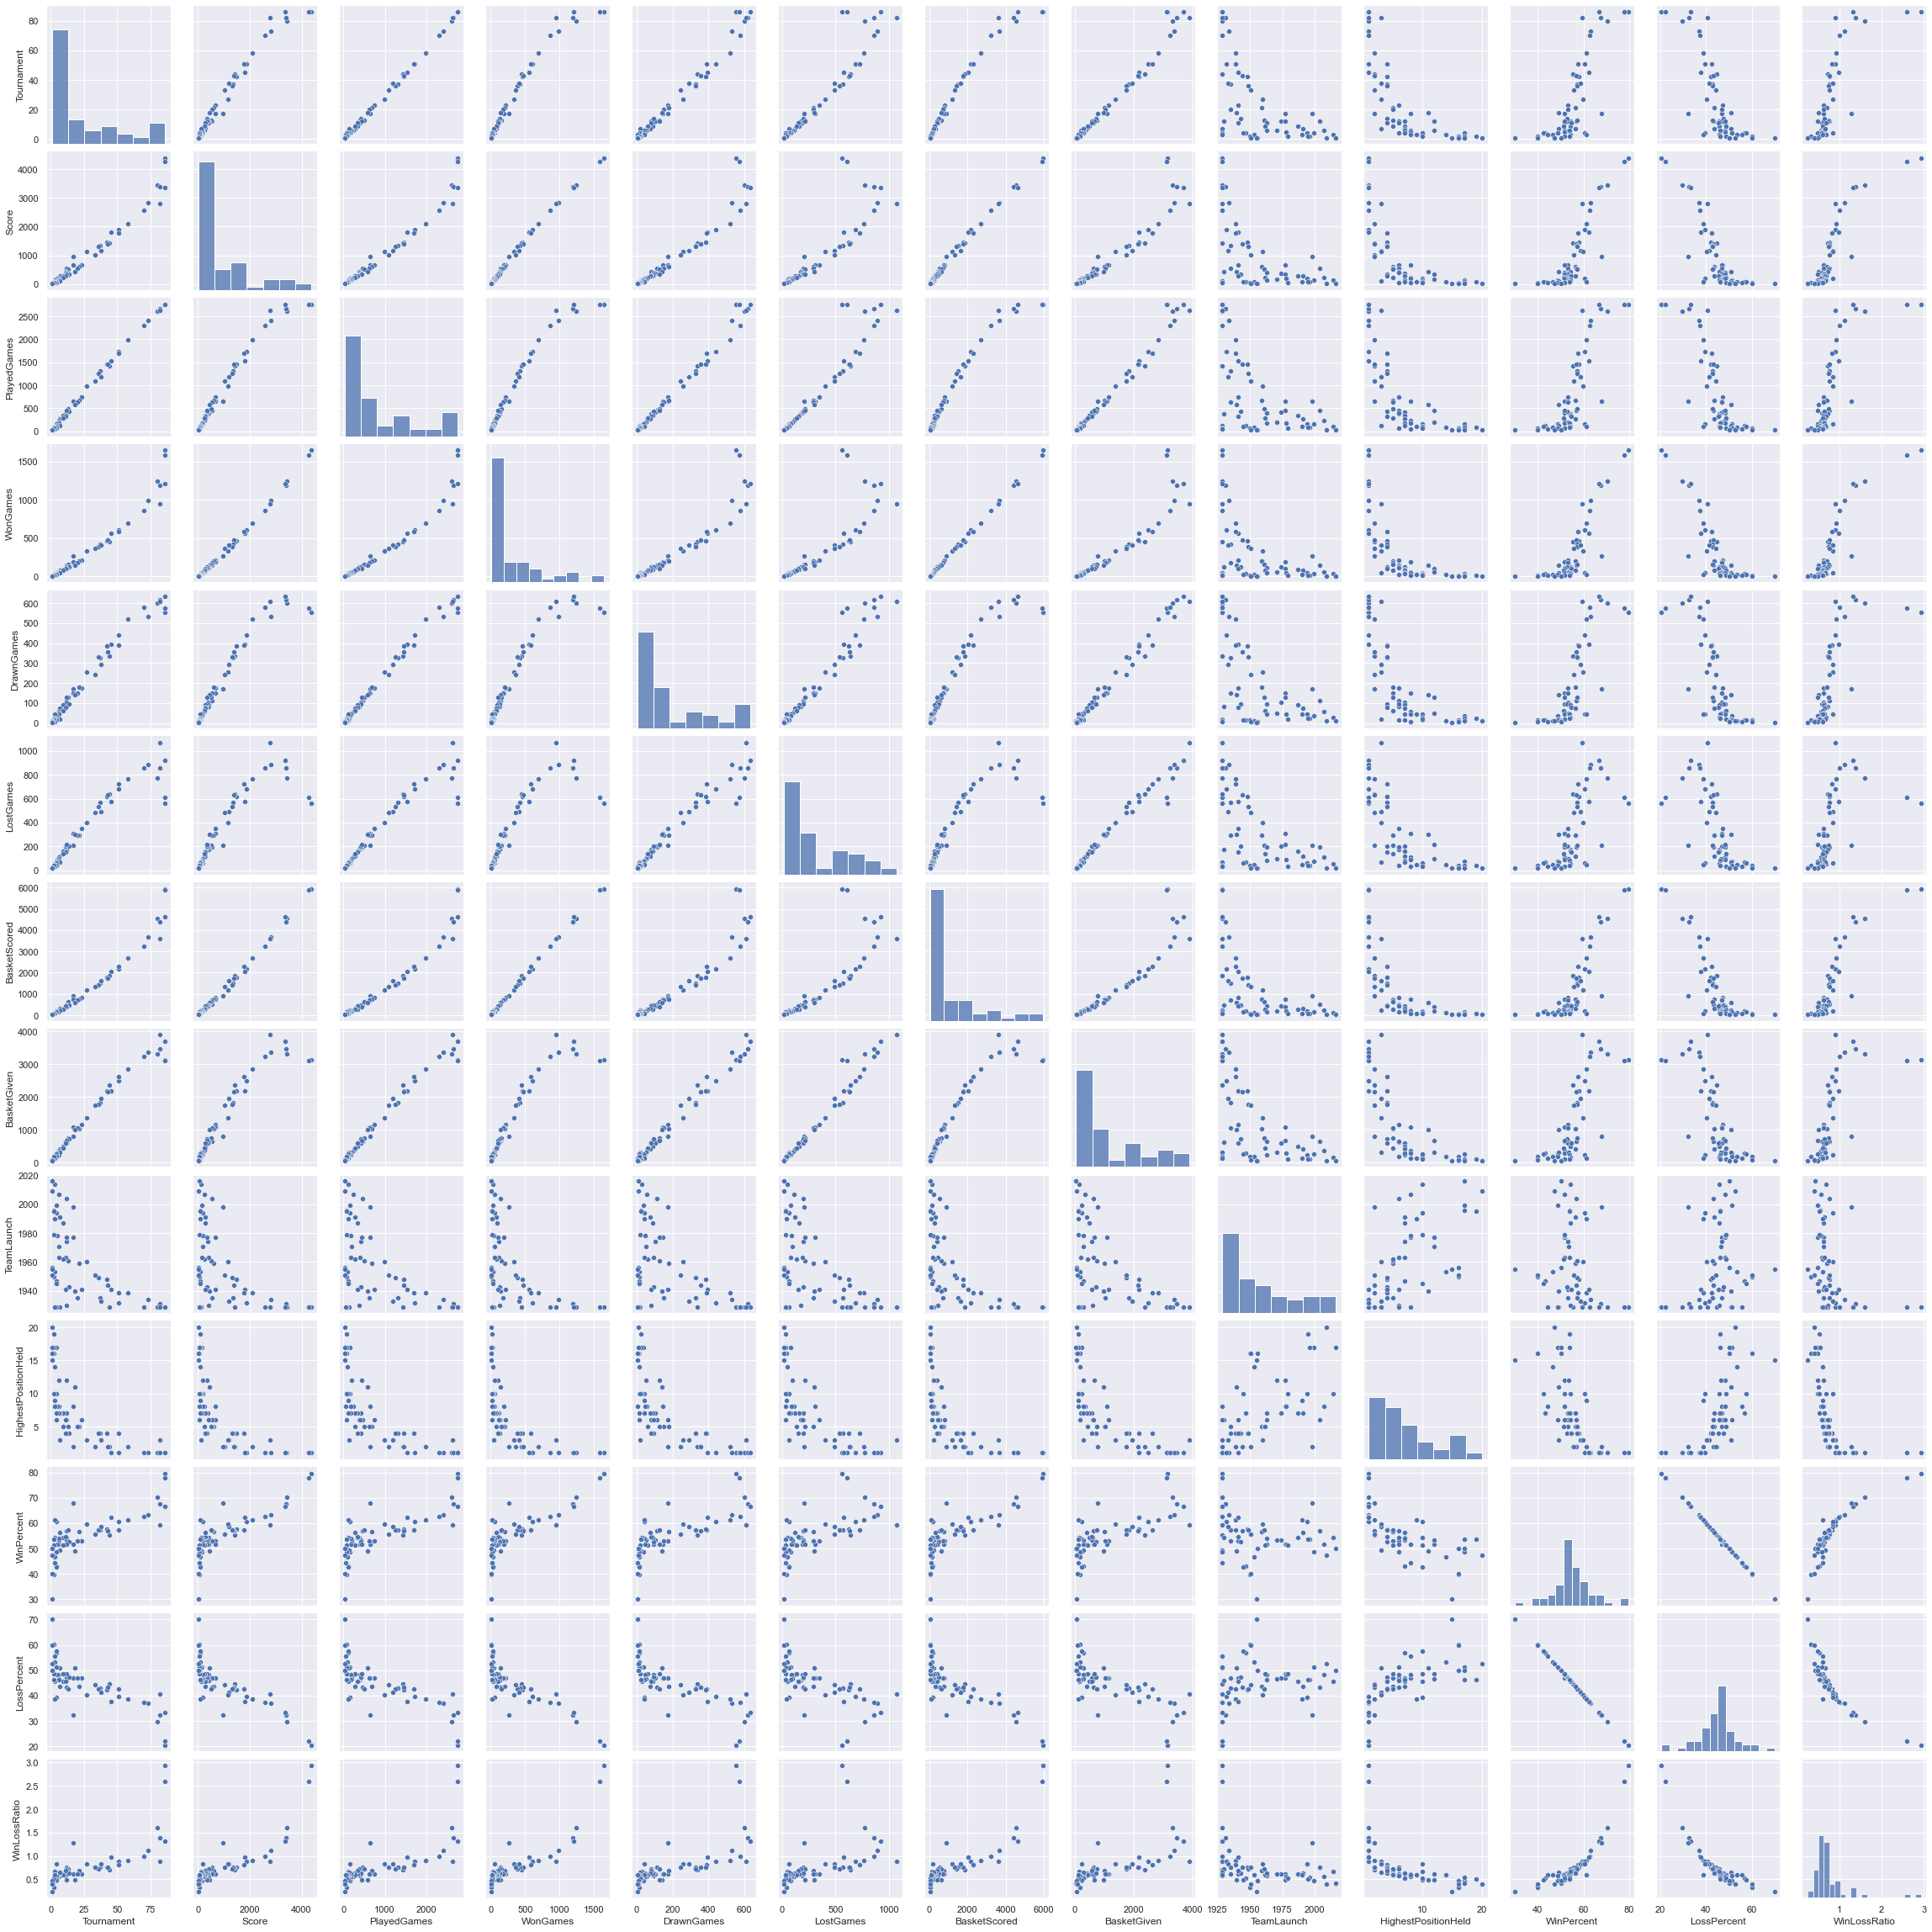

In [61]:
sns.pairplot(data)

In [36]:
print("team Which has won most games = ",data[data['WonGames'] == data['WonGames'].max()].index.values[0])

team Which has won most games =  Team 1


In [37]:
print("team Which has highest Winning Percentage = ",data[data['WinPercent'] == data['WinPercent'].max()].index.values[0])

team Which has highest Winning Percentage =  Team 1


In [38]:
print("team Which has lowest loss perecentage  = ",data[data['LossPercent'] == data['LossPercent'].min()].index.values[0])

team Which has lowest loss perecentage  =  Team 1


In [39]:
print("team Which has highest win to loss ratio  = ",data[data['WinLossRatio'] == data['WinLossRatio'].max()].index.values[0])

team Which has highest win to loss ratio  =  Team 1


In [40]:
print("team Which has more scored more baskets = ",data[data['BasketScored'] == data['BasketScored'].max()].index.values[0])

team Which has more scored more baskets =  Team 1


In [41]:
print("team Which has more scored more score = ",data[data['Score'] == data['Score'].max()].index.values[0])

team Which has more scored more score =  Team 1


# I would recommend to go with team 1

### It has Secured 1 place in all above stats 

#### if 1 is booked then Go for team 2 
#### if 2 is booked then go for team 3
#### if all above are booked then i would recommend team 21


In [43]:
oldest_teams = data[data['TeamLaunch'] == data['TeamLaunch'].min()].index.values

In [44]:
print("Oldest Teams are : ")
for team in oldest_teams:
    print("\t \t\t",team,data.loc[team,'TeamLaunch'])

Oldest Teams are : 
	 		 Team 1 1929
	 		 Team 2 1929
	 		 Team 3 1929
	 		 Team 5 1929
	 		 Team 7 1929
	 		 Team 8 1929
	 		 Team 14 1929
	 		 Team 45 1929
	 		 Team 52 1929
	 		 Team 54 1929


####  I Suggest the Association to to include 
      1 . To add team size or count of players
      2 . Reduce number of null values 
      3 . Enter data in correct format 